In [1]:
temp = 21
speed_sound = 343
density_air = 1.2002
total_pressure_settling_chamber = 368
static_pressure_at_inlet = 336


In [3]:
import math
def converted_pressure(p):
    return p*9.81
def velocity_cal(pt,pi,d):
    vel = math.sqrt(2*(converted_pressure(pt)-converted_pressure(pi))/d)
    return vel
def calculate_error(u_actual,u_calculated):
    error = ((u_calculated-u_actual)/u_actual)*100
    return error

In [4]:
import pandas as pd 
df = pd.read_csv('Flow-Uniformity.csv')
df

,PROBE,Total Pressure(P0),Static Pressure(Pi)
0,H1,368,332
1,H2,368,332
2,H3,368,332
3,H4,368,334
4,V1,368,332
5,V2,368,332
6,V3,368,332
7,V4,368,332
8,V5,368,332


In [5]:
u_actual = velocity_cal(total_pressure_settling_chamber,static_pressure_at_inlet,density_air)
u_actual

22.871659636565767

In [9]:
df['Velocity at Probe Location'] = df.apply(
    lambda x: velocity_cal(x['Total Pressure(P0)'], x['Static Pressure(Pi)'], density_air), axis=1
)


In [12]:
df['Inlet Velocity'] = df.apply(
    lambda x: u_actual, axis=1
)

In [15]:
df['Error'] = df.apply(
    lambda x : calculate_error(x['Inlet Velocity'],x['Velocity at Probe Location']), axis=1
)

In [17]:
df

,PROBE,Total Pressure(P0),Static Pressure(Pi),Velocity at Probe Location,Inlet Velocity,Error
0,H1,368,332,24.259058,22.87166,6.066017
1,H2,368,332,24.259058,22.87166,6.066017
2,H3,368,332,24.259058,22.87166,6.066017
3,H4,368,334,23.575567,22.87166,3.077641
4,V1,368,332,24.259058,22.87166,6.066017
5,V2,368,332,24.259058,22.87166,6.066017
6,V3,368,332,24.259058,22.87166,6.066017
7,V4,368,332,24.259058,22.87166,6.066017
8,V5,368,332,24.259058,22.87166,6.066017


# Graphs

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
horizontal_probes = df[df['PROBE'].str.startswith('H')]
horizontal_probes

,PROBE,Total Pressure(P0),Static Pressure(Pi),Velocity at Probe Location,Inlet Velocity,Error
0,H1,368,332,24.259058,22.87166,6.066017
1,H2,368,332,24.259058,22.87166,6.066017
2,H3,368,332,24.259058,22.87166,6.066017
3,H4,368,334,23.575567,22.87166,3.077641


In [24]:
vertical_probes = df[df['PROBE'].str.startswith('V')]
vertical_probes

,PROBE,Total Pressure(P0),Static Pressure(Pi),Velocity at Probe Location,Inlet Velocity,Error
4,V1,368,332,24.259058,22.87166,6.066017
5,V2,368,332,24.259058,22.87166,6.066017
6,V3,368,332,24.259058,22.87166,6.066017
7,V4,368,332,24.259058,22.87166,6.066017
8,V5,368,332,24.259058,22.87166,6.066017


In [38]:
def generate_plots(x_label_name, y_label_name, plot_title, x_name, y_name, df, y_max,save_path = None):
    sns.set_theme(style="whitegrid", palette="deep", context="notebook")
    plt.figure(figsize=(12, 7)) 
    sns.lineplot(
        x=x_name,
        y=y_name,
        data=df,
        marker='o', 
        markersize=8,
        linewidth=2.5,
        color="#1f77b4",  
        label=y_label_name,
    )
    plt.grid(which='both', linestyle='--', linewidth=0.7, alpha=0.6)
    plt.minorticks_on()
    plt.xlabel(x_label_name, fontsize=14, labelpad=10, weight="bold", color="#333333")
    plt.ylabel(y_label_name, fontsize=14, labelpad=10, weight="bold", color="#333333")
    plt.title(
        plot_title,
        fontsize=18,
        pad=20,
        weight="bold",
        color="#1f77b4"
    )
    plt.ylim(0, y_max)
    plt.legend(fontsize=12, loc='best', frameon=True, shadow=True, edgecolor="black")
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()


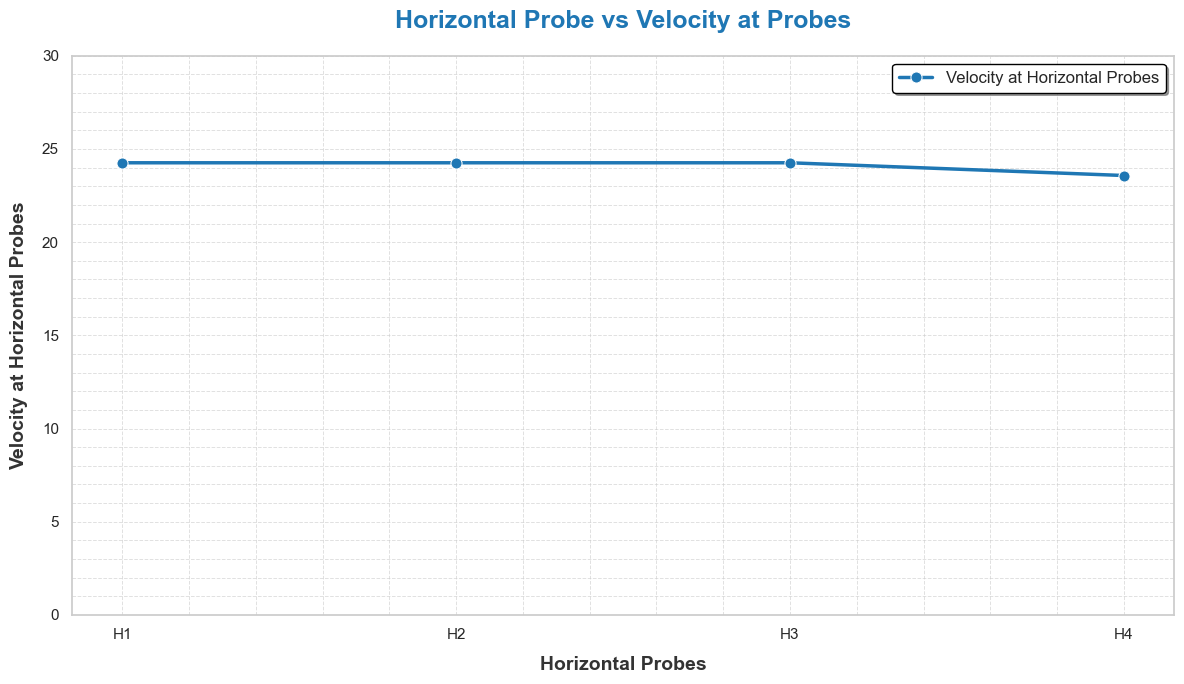

In [40]:
generate_plots('Horizontal Probes','Velocity at Horizontal Probes','Horizontal Probe vs Velocity at Probes','PROBE','Velocity at Probe Location',horizontal_probes,30,'Horizontal_vs_velocity.png')

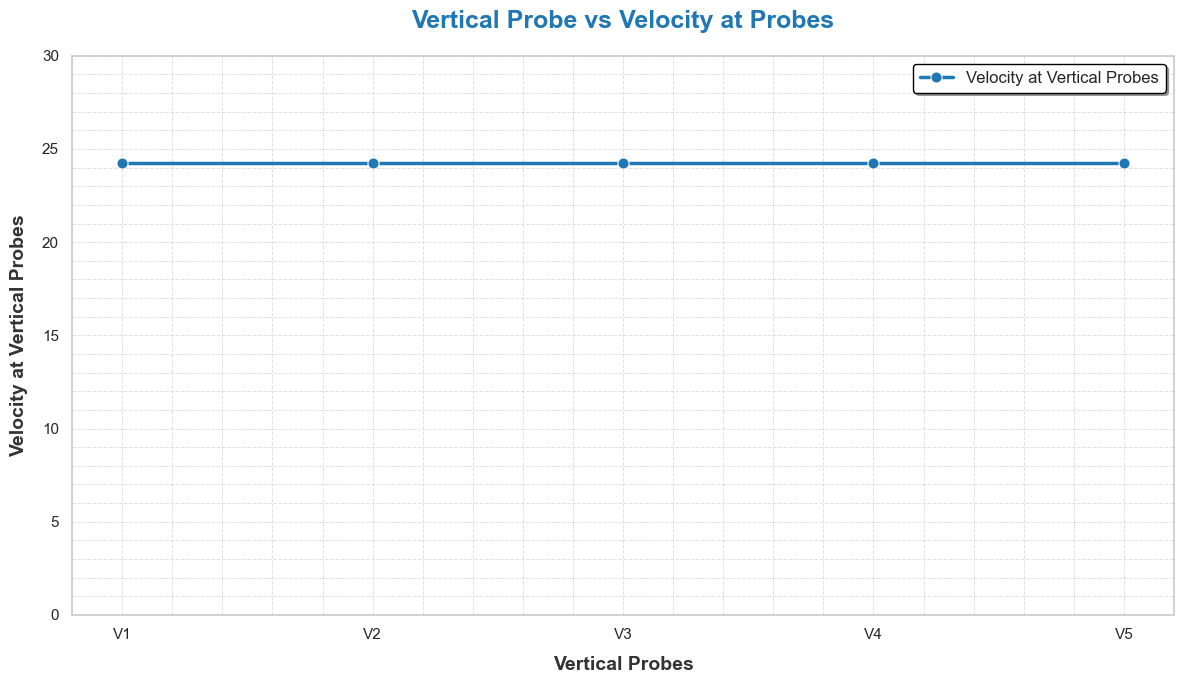

In [44]:
generate_plots('Vertical Probes','Velocity at Vertical Probes','Vertical Probe vs Velocity at Probes','PROBE','Velocity at Probe Location',vertical_probes,30,'Vertical_vs_velocity.png')

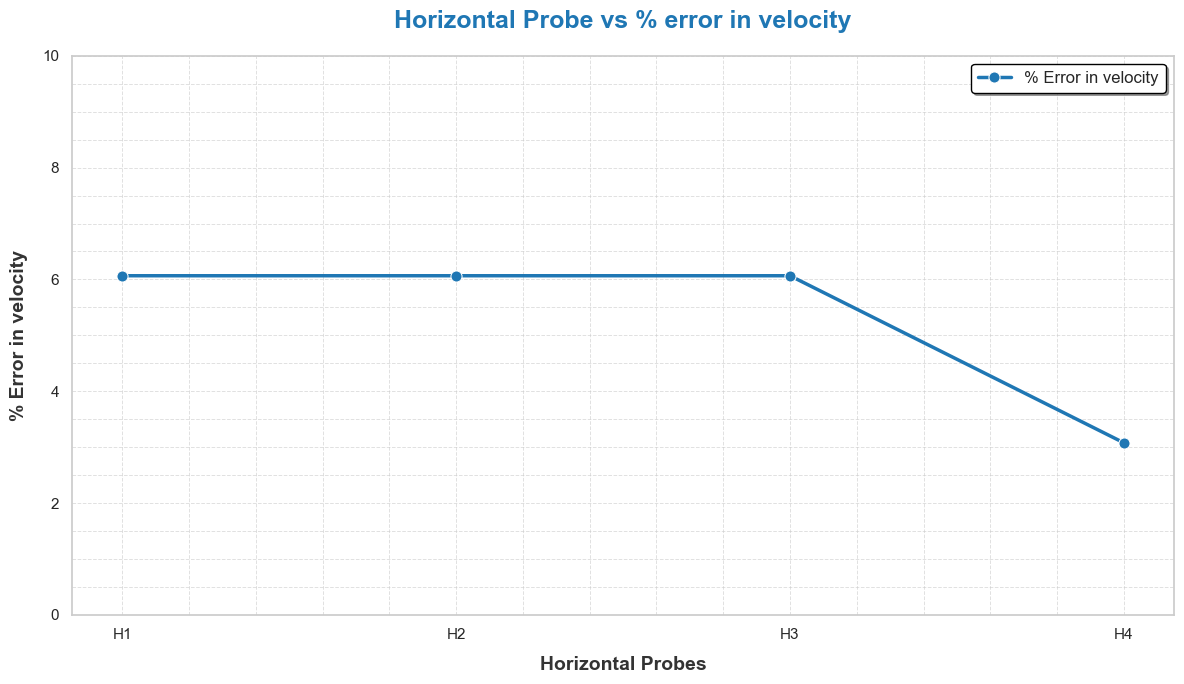

In [46]:
generate_plots('Horizontal Probes','% Error in velocity','Horizontal Probe vs % error in velocity','PROBE','Error',horizontal_probes,10,'Horizontal_vs_error_in_velocity.png')

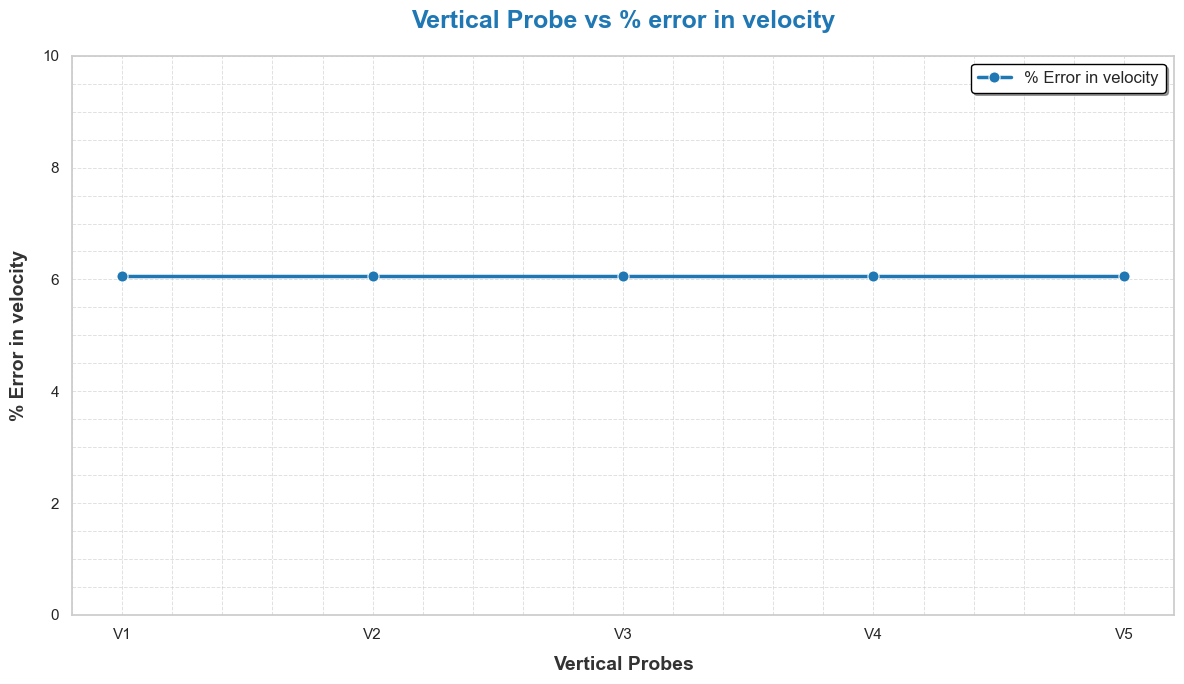

In [48]:
generate_plots('Vertical Probes','% Error in velocity','Vertical Probe vs % error in velocity','PROBE','Error',vertical_probes,10,'Vertical_vs_error_in_velocity.png')